In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from PutModelData import get_season_game_stats, get_season_cum_stats, get_game_results, get_boxscores
from PutMatchups import put_season_matchups
# get_season_game_stats().sort_values(["Date", 'TeamName'])[['Date', 'TeamName','2P', '3P', 'FT', 'PTS', 'Score', 'ScoreDiff']]
# get_game_results().sort_values(['Date', 'TeamName'])
# get_boxscores().sort_values(['Date', 'TeamName'])

In [42]:
GameStats = get_season_game_stats()
GameStats['FGpct'] = GameStats['FG'] / GameStats['FGA']
GameStats['FTpct'] = GameStats['FT'] / GameStats['FTA']

GameStats['Date'] = pd.to_datetime(GameStats['Date'])
GameStats = GameStats.sort_values(['Date', 'TeamName']).set_index(['Date', 'TeamName'])

variables = [c for c in sorted(GameStats.columns) if c is not 'TeamName']
GameStats[[c+'Lag1' for c in variables]] = GameStats[variables].groupby(level=1).shift(1)
GameStats[[c+'3GameAvg' for c in variables]] = GameStats[[c+'Lag1' for c in variables]].groupby(level=1).apply(pd.rolling_mean, 3, min_periods=1)
GameStats.to_csv('./../data/deletable.csv')
# GameStats[variables].groupby(level=1).shift(1)

In [47]:
import statsmodels.api as sm
GameStats.dropna()
y_cols = ['Win']
game_vars = ['FGpct', 'FGA', 'FTpct', 'FT', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Points', 'ScoreDiff']
# X_cols = ['FGALag1', 'FGA3GameAvg', 'FGpctLag1', 'FGpct3GameAvg', 'FTpctLag1', 'FTpct3GameAvg', 'PFLag1', 'PF3GameAvg']
X_cols = ['FGA3GameAvg', 'FGpct3GameAvg', 'FTpct3GameAvg', 'PF3GameAvg', 'ScoreDiff3GameAvg']
# X_cols = ['FGALag1', 'FGpctLag1', 'FTpctLag1', 'PFLag1', 'ScoreDiffLag1']
all_variables = y_cols + X_cols
Data = GameStats[all_variables]
Data = Data.dropna()
y = Data[y_cols]
X = Data[X_cols]
logit_model = sm.Logit(y, X)

  # fit the model
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.671166
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    Win   No. Observations:                 5114
Model:                          Logit   Df Residuals:                     5109
Method:                           MLE   Df Model:                            4
Date:                Sun, 12 Mar 2017   Pseudo R-squ.:                 0.03166
Time:                        12:51:19   Log-Likelihood:                -3432.3
converged:                       True   LL-Null:                       -3544.6
                                        LLR p-value:                 2.067e-47
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
FGA3GameAvg          -0.0128      0.004     -2.862      0.004        -0.022    -0.004
FGpct3Ga

In [8]:
# np.exp(result.params)
# GameStats[['FGA', 'FGA3GameAvg']]

Boxscores = pd.read_csv('./../data/boxscores-2017.txt', sep='\t', index_col=False)
Boxscores['Date'] = pd.to_datetime(Boxscores['Date'])
Boxscores = Boxscores.rename(columns={'Team': 'TeamName'})
Boxscores = Boxscores[['Date', 'TeamName', 'Player', 'FG', 'FGA', 'FT', 'FTA', 'ORB', 'DRB', 'PF']]
Boxscores.sort_values(['Date', 'TeamName'])

,Date,TeamName,Player,FG,FGA,FT,FTA,ORB,DRB,PF
210,2017-01-01,Alabama-Birmingham,Reggie Upshaw,11.0,16.0,8.0,11.0,2.0,7.0,2.0
211,2017-01-01,Alabama-Birmingham,Xavier Habersham,2.0,3.0,0.0,0.0,2.0,2.0,1.0
212,2017-01-01,Alabama-Birmingham,JaCorey Williams,4.0,14.0,2.0,3.0,3.0,4.0,1.0
213,2017-01-01,Alabama-Birmingham,Giddy Potts,2.0,8.0,0.0,1.0,1.0,2.0,5.0
214,2017-01-01,Alabama-Birmingham,Tyrik Dixon,1.0,3.0,0.0,0.0,0.0,2.0,4.0
215,2017-01-01,Alabama-Birmingham,Edward Simpson,0.0,1.0,0.0,0.0,0.0,1.0,0.0
216,2017-01-01,Alabama-Birmingham,Brandon Walters,1.0,1.0,0.0,0.0,0.0,5.0,3.0
217,2017-01-01,Alabama-Birmingham,Antwain Johnson,0.0,1.0,1.0,2.0,0.0,0.0,3.0
218,2017-01-01,Alabama-Birmingham,Karl Gamble,0.0,0.0,0.0,0.0,0.0,0.0,0.0
342,2017-01-01,Arizona,Dorian Pickens,3.0,10.0,3.0,5.0,0.0,2.0,2.0


(array([    7.,    53.,   284.,   837.,  1455.,  1237.,   799.,   340.,
           88.,    13.]),
 array([ 0.18965517,  0.24068966,  0.29172414,  0.34275862,  0.3937931 ,
         0.44482759,  0.49586207,  0.54689655,  0.59793103,  0.64896552,
         0.7       ]),
 <a list of 10 Patch objects>)

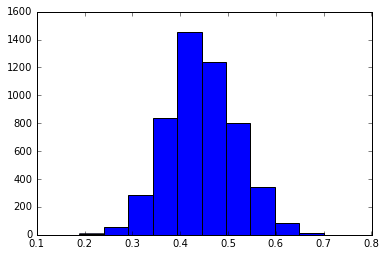

In [21]:
plt.hist(Data['FGpct'])